# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/city.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_list = []
print(f"Beginning data retrieval")
print("------------------------------")
set = 1
record = 1
for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ api_key
    city_url = base_url + "&q="+city
    if record == 20 :
        set+=1
        record = 1
    
    try:
        # make request and print url
        city_data = requests.get(city_url).json()
        city_lat = city_data['coord']['lat']
        city_lon = city_data['coord']['lon']
        city_temp = city_data ['main']['temp_max']
        city_humidity = city_data['main']['humidity']
        city_cloud = city_data['clouds']['all']
        city_country = city_data['sys']['country']
        city_windsp = city_data['wind']['speed']
        city_date = city_data['dt']
        city_list.append({'City':city,'Cloudiness':city_cloud,'Country':city_country,'Date':city_date,'Humidity':city_humidity,'Lat':city_lat,'Lng': city_lon,'Max Temp':city_temp,
                         'Wind speed':city_windsp,})
        print(f'Processing record {record} of set {set}|{city}')
    except (KeyError, IndexError):
        print(f"City not found. Skipping... ")
    record += 1
    


    

Beginning data retrieval
------------------------------
Processing record 1 of set 1|dunedin
Processing record 2 of set 1|mayumba
City not found. Skipping... 
Processing record 4 of set 1|lagoa
Processing record 5 of set 1|tiksi
Processing record 6 of set 1|bredasdorp
Processing record 7 of set 1|brus laguna
Processing record 8 of set 1|leningradskiy
Processing record 9 of set 1|sorgun
Processing record 10 of set 1|bandarbeyla
Processing record 11 of set 1|airai
Processing record 12 of set 1|rikitea
Processing record 13 of set 1|ushuaia
Processing record 14 of set 1|port alfred
Processing record 15 of set 1|dikson
Processing record 16 of set 1|ginir
Processing record 17 of set 1|muros
Processing record 18 of set 1|sitangkai
Processing record 19 of set 1|sao joao da barra
Processing record 1 of set 2|pag
Processing record 2 of set 2|hilo
Processing record 3 of set 2|marabba
City not found. Skipping... 
City not found. Skipping... 
Processing record 6 of set 2|logrono
Processing record 7

Processing record 4 of set 12|koumac
Processing record 5 of set 12|atuona
Processing record 6 of set 12|celestun
Processing record 7 of set 12|beian
Processing record 8 of set 12|norman wells
Processing record 9 of set 12|saint-pierre
Processing record 10 of set 12|mezen
Processing record 11 of set 12|tuktoyaktuk
Processing record 12 of set 12|melilla
Processing record 13 of set 12|starkville
City not found. Skipping... 
Processing record 15 of set 12|znamenskoye
Processing record 16 of set 12|palmer
Processing record 17 of set 12|morwa
Processing record 18 of set 12|kaeo
Processing record 19 of set 12|kahului
Processing record 1 of set 13|nalut
Processing record 2 of set 13|dudinka
City not found. Skipping... 
Processing record 4 of set 13|vardo
Processing record 5 of set 13|dingle
Processing record 6 of set 13|aykhal
Processing record 7 of set 13|rovaniemi
City not found. Skipping... 
Processing record 9 of set 13|te anau
Processing record 10 of set 13|laguna
Processing record 11 of 

Processing record 4 of set 23|rio gallegos
Processing record 5 of set 23|santa luzia
Processing record 6 of set 23|brandon
Processing record 7 of set 23|caudry
City not found. Skipping... 
Processing record 9 of set 23|mehamn
Processing record 10 of set 23|muborak
Processing record 11 of set 23|dzaoudzi
Processing record 12 of set 23|kvareli
Processing record 13 of set 23|shingu
Processing record 14 of set 23|sorong
Processing record 15 of set 23|hauterive
Processing record 16 of set 23|bom jesus
Processing record 17 of set 23|bagdarin
Processing record 18 of set 23|lavrentiya
City not found. Skipping... 
Processing record 1 of set 24|bambanglipuro
Processing record 2 of set 24|bolobo
Processing record 3 of set 24|polunochnoye
Processing record 4 of set 24|kerouane
Processing record 5 of set 24|ugoofaaru
Processing record 6 of set 24|whitehorse
Processing record 7 of set 24|aden
Processing record 8 of set 24|atyashevo
Processing record 9 of set 24|tartagal
Processing record 10 of set 2

In [4]:
city_list

[{'City': 'sangin',
  'Cloudiness': 0,
  'Country': 'AF',
  'Date': 1563037198,
  'Humidity': 9,
  'Lat': 32.07,
  'Lng': 64.85,
  'Max Temp': 89.15,
  'Wind speed': 5.59},
 {'City': 'rikitea',
  'Cloudiness': 22,
  'Country': 'PF',
  'Date': 1563037122,
  'Humidity': 84,
  'Lat': -23.12,
  'Lng': -134.97,
  'Max Temp': 74.57,
  'Wind speed': 12.3},
 {'City': 'busselton',
  'Cloudiness': 0,
  'Country': 'AU',
  'Date': 1563036877,
  'Humidity': 65,
  'Lat': -33.64,
  'Lng': 115.35,
  'Max Temp': 44.01,
  'Wind speed': 17.63},
 {'City': 'kapaa',
  'Cloudiness': 20,
  'Country': 'US',
  'Date': 1563037127,
  'Humidity': 78,
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 78.8,
  'Wind speed': 12.75},
 {'City': 'calvinia',
  'Cloudiness': 0,
  'Country': 'ZA',
  'Date': 1563037198,
  'Humidity': 37,
  'Lat': -31.47,
  'Lng': 19.78,
  'Max Temp': 52.97,
  'Wind speed': 2.48},
 {'City': 'hobart',
  'Cloudiness': 85,
  'Country': 'AU',
  'Date': 1563036941,
  'Humidity': 80,
  'Lat': -42.88,

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Save Data to csv
#city_data_df = output_data_file
city_list_df = pd.DataFrame(city_list)
city_list_df
city_list_df.to_csv("output_data_file", index=False, header=True)
city_list_df.head(10)

# Visualize to confirm airport data appears
#city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed
0,sangin,0,AF,1563037198,9,32.07,64.85,89.15,5.59
1,rikitea,22,PF,1563037122,84,-23.12,-134.97,74.57,12.30
2,busselton,0,AU,1563036877,65,-33.64,115.35,44.01,17.63
3,kapaa,20,US,1563037127,78,22.08,-159.32,78.80,12.75
4,calvinia,0,ZA,1563037198,37,-31.47,19.78,52.97,2.48
5,hobart,85,AU,1563036941,80,-42.88,147.33,42.01,1.99
6,geraldton,20,CA,1563037198,52,49.72,-86.95,66.20,16.11
7,puerto ayora,75,EC,1563036997,65,-0.74,-90.35,77.00,13.87
8,oistins,75,BB,1563037198,62,13.07,-59.53,87.80,23.04
9,tazovskiy,50,RU,1563037165,72,67.47,78.70,46.13,7.56


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

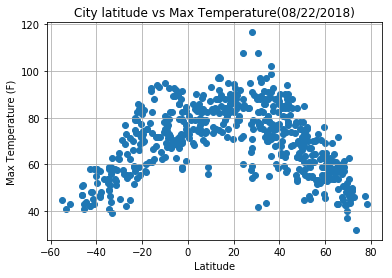

In [6]:
# Build a scatter plot for each data type
plt.scatter(city_list_df["Lat"], city_list_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City latitude vs Max Temperature(08/22/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_lat_vs_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

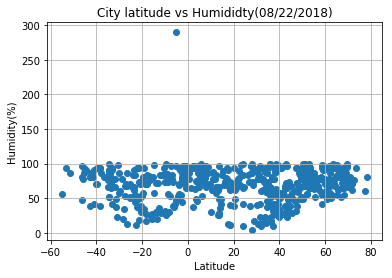

In [7]:
# Build a scatter plot for each data type
plt.scatter(city_list_df["Lat"], city_list_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City latitude vs Humididty(08/22/2018)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

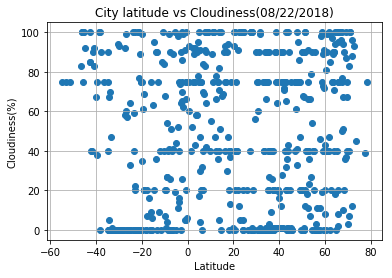

In [8]:
# Build a scatter plot for each data type
plt.scatter(city_list_df["Lat"], city_list_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City latitude vs Cloudiness(08/22/2018)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

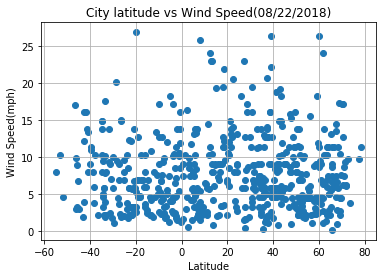

In [9]:
# Build a scatter plot for each data type
plt.scatter(city_list_df["Lat"], city_list_df["Wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("City latitude vs Wind Speed(08/22/2018)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_lat_vs_wind_speed.png")

# Show plot
plt.show()